In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**ANSWER-9.**

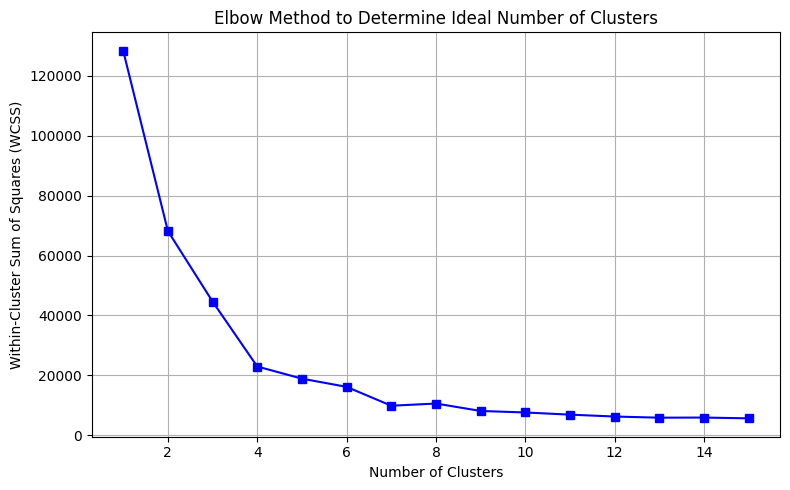

In [3]:
#ANSWER - 9a.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = "/content/drive/MyDrive/EE708/A3_P1.csv"
df = pd.read_csv(file_path)

features = df.select_dtypes(include=[np.number])

inertia_values = []
cluster_options = range(1, 16)

for k in cluster_options:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(features)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_options, inertia_values, marker='s', color='b')
plt.title('Elbow Method to Determine Ideal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()


**IF WE USE FIRST ELBOW, MEANS NUMBER OF CLUSTERS AS FOUR (4).**

ANSWER-9B.:-
From the graph we can see the the elbow is coming at k=4. So the optimal number of clusters are four

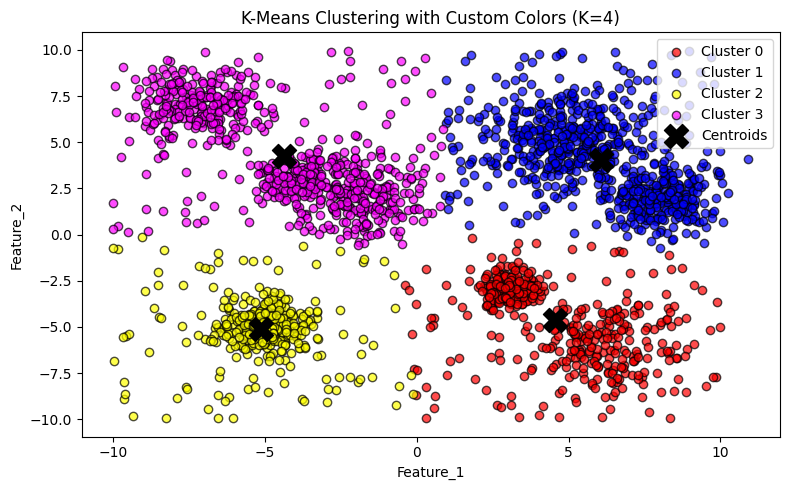

In [6]:
#ANSWER 9c.

#It can be observed that the first elbow is at four number of clusters.
#So using K = 4 plot the graph of k-means clustering.

k_value = 4
clustering_model = KMeans(n_clusters=k_value, random_state=42)
df['Group'] = clustering_model.fit_predict(features)

colors = ['red', 'blue', 'yellow', 'magenta']

plt.figure(figsize=(8, 5))

for cluster_id in range(k_value):
    cluster_points = features[df['Group'] == cluster_id]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
                color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, edgecolors='k')

centroids = clustering_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            color='black', marker='X', s=300, label='Centroids')

plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title("K-Means Clustering with Custom Colors (K=4)")
plt.legend()
plt.tight_layout()
plt.show()


**IF WE USE SECOND ELBOW, MEANS NUMBER OF CLUSTERS AS SEVEN (7).**

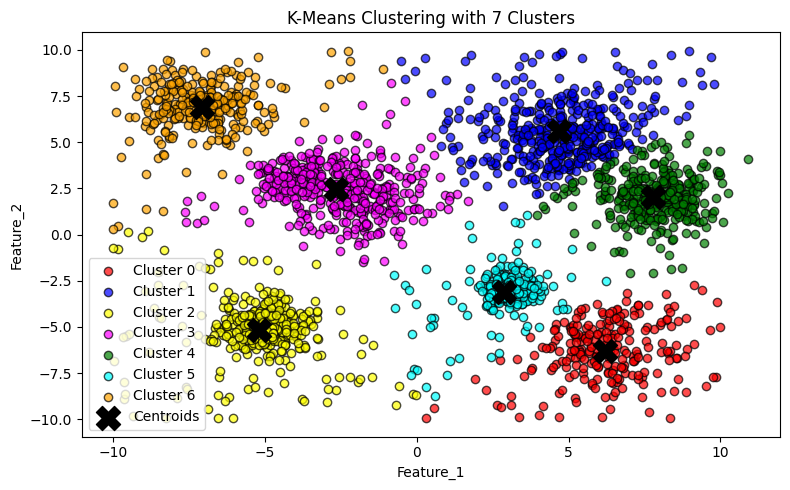

In [7]:
#The second elbow is shown at seven number of clusters.
#So try to plot K-Means Clustering plot with K=7.

k_value = 7
clustering_model = KMeans(n_clusters=k_value, random_state=42)
df['Group'] = clustering_model.fit_predict(features)

colors = ['red', 'blue', 'yellow', 'magenta', 'green', 'cyan', 'orange']

plt.figure(figsize=(8, 5))

for cluster_id in range(k_value):
    cluster_points = features[df['Group'] == cluster_id]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1],
                color=colors[cluster_id], label=f'Cluster {cluster_id}', alpha=0.7, edgecolors='k')

centroids = clustering_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            color='black', marker='X', s=300, label='Centroids')

plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title("K-Means Clustering with 7 Clusters")
plt.legend()
plt.tight_layout()
plt.show()


**# ANSWER-10**

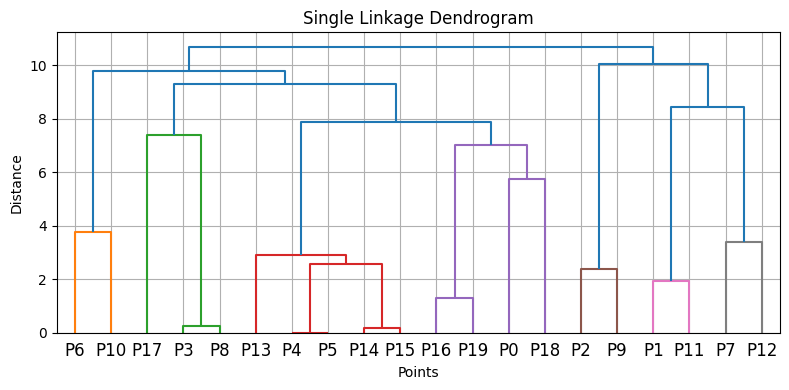

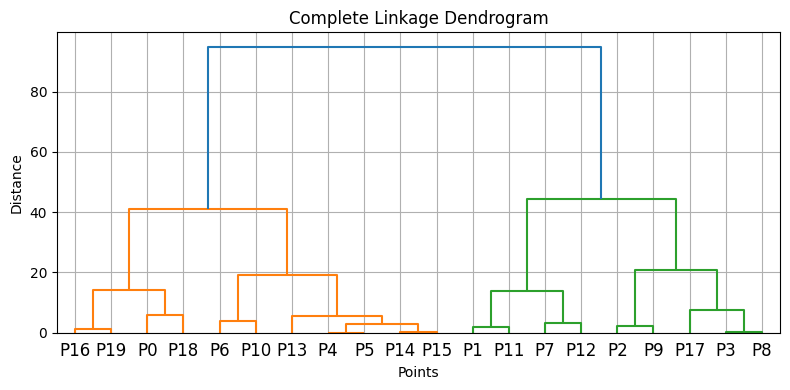

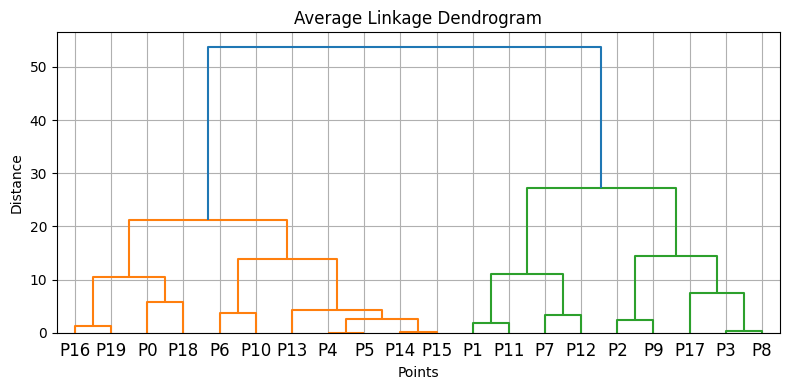

In [12]:
#ANSWER-10.

from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv("/content/drive/MyDrive/EE708/A3_P2.csv")
X = data.values

linkage_methods = ['single', 'complete', 'average']

for method in linkage_methods:
    Z = linkage(X, method=method)

    plt.figure(figsize=(8, 4))
    dendrogram(Z, labels=[f"P{i}" for i in range(len(X))])
    plt.title(f"{method.capitalize()} Linkage Dendrogram")
    plt.xlabel("Points")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
